In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

In [3]:
fnmist=tf.keras.datasets.fashion_mnist
(xtrain,ytrain) ,(xtest,ytest)=fnmist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
print("shape of xtrain is",xtrain.shape)

shape of xtrain is (60000, 28, 28)


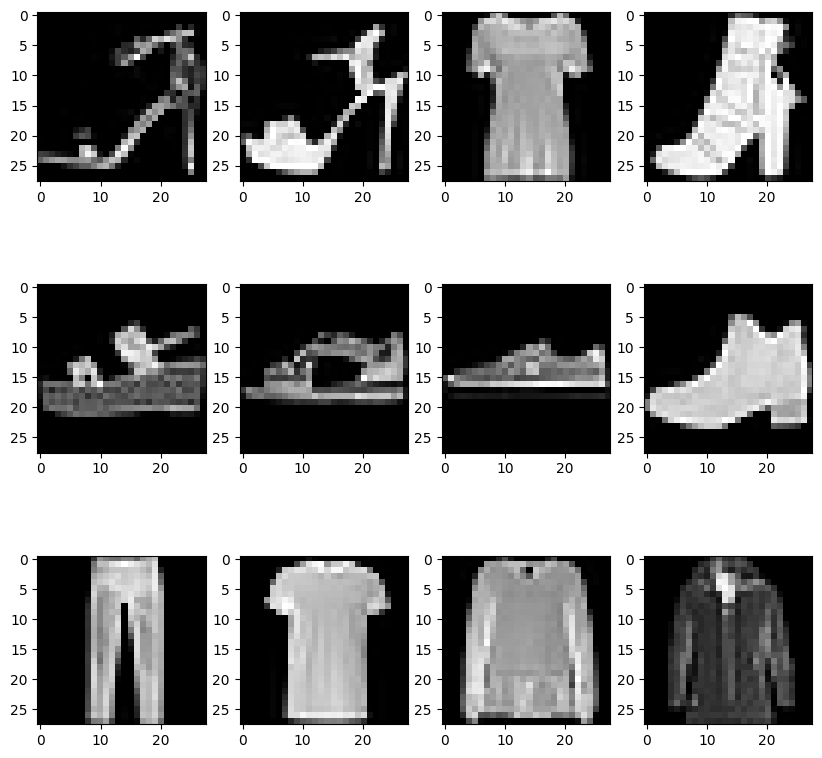

In [5]:
fig=plt.figure(figsize=(10,10))
for i in range(12):
  fig.add_subplot(3,4,i+1)
  plt.imshow(xtrain[i+8],cmap=plt.get_cmap("gray"))

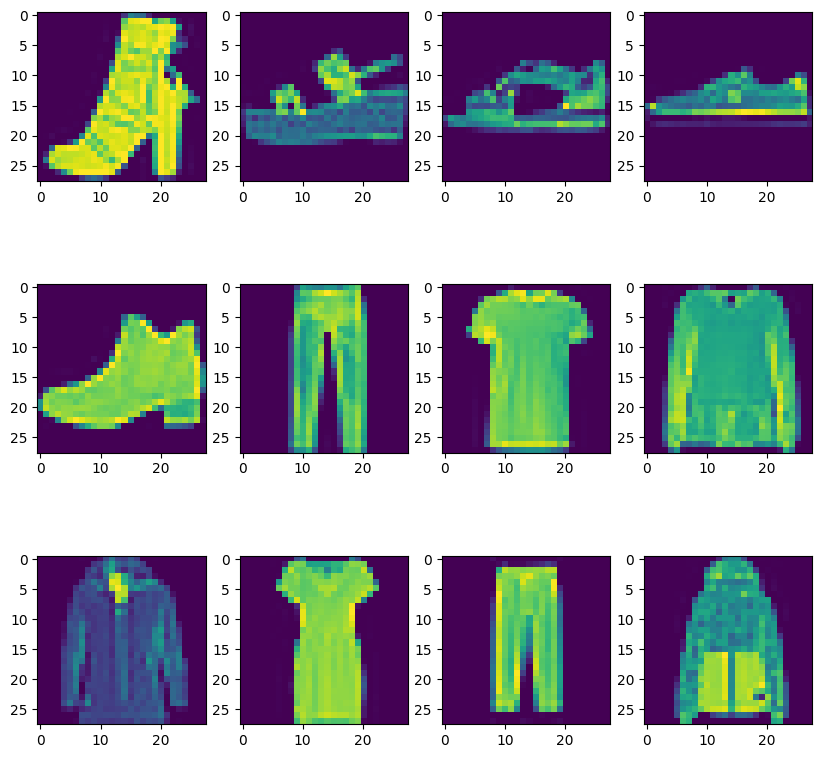

In [6]:
fig=plt.figure(figsize=(10,10))
for i in range(12):
  fig.add_subplot(3,4,i+1)
  plt.imshow(xtrain[i+11])


In [8]:
xtrain=xtrain.reshape([60000,28,28,1])
xtrain=xtrain.astype('float32')/255.0
print(xtrain.shape)

(60000, 28, 28, 1)


In [11]:
xtest = xtest.reshape([10000, 28, 28, 1])
xtest = xtest.astype('float32') / 255.0


In [13]:
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=[28,28,1]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)              

In [14]:
ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 75s 39ms/step - loss: 0.4234 - accuracy: 0.8452
Epoch 2/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.2790 - accuracy: 0.8966
Epoch 3/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2337 - accuracy: 0.9132
Epoch 4/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1989 - accuracy: 0.9244
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1702 - accuracy: 0.9360
Epoch 6/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1456 - accuracy: 0.9448
Epoch 7/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1221 - accuracy: 0.9548
Epoch 8/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1002 - accuracy: 0.9620
Epoch 9/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0860 - accuracy: 0.9671
Epoch 10/10
1875/1875 [==============================] - 73s 39m

In [16]:
values=model.evaluate(xtest,ytest)
print(values)
print(model.metrics_names)

313/313 [==============================] - 7s 21ms/step - loss: 0.3386 - accuracy: 0.9141
[0.33860352635383606, 0.9140999913215637]
['loss', 'accuracy']


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(xtest)

313/313 [==============================] - 5s 14ms/step


In [20]:
predictions.shape

(10000, 10)

In [21]:
import numpy as np
np.argmax(predictions[6])

4

In [23]:
ytest[6]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)